In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
Theft_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/theft_data.csv')

In [ ]:
Theft_data


,Unnamed: 0,TYPE,YEAR,MONTH
0,0,Other Theft,2003,5
1,1,Other Theft,2003,5
2,2,Other Theft,2003,4
3,3,Other Theft,2003,4
4,4,Other Theft,2003,4
...,...,...,...,...
52162,530612,Other Theft,2017,1
52163,530618,Other Theft,2017,2
52164,530622,Other Theft,2017,2
52165,530623,Other Theft,2017,5


In [ ]:
theft_count = pd.DataFrame(Theft_data.groupby(['YEAR','MONTH']).size().rename('counts').reset_index())

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scaling=MinMaxScaler()

In [ ]:
#theft_count=scaling.fit_transform(theft_count[['YEAR','MONTH','counts']])

In [ ]:
#from sklearn.preprocessing import StandardScaler

In [ ]:
#scaling=StandardScaler()

In [ ]:
#scaling.fit_transform(theft_count[['YEAR','MONTH','counts']])

In [ ]:
theft_count

,YEAR,MONTH,counts
0,2003,1,247
1,2003,2,219
2,2003,3,208
3,2003,4,235
4,2003,5,223
...,...,...,...
170,2017,3,487
171,2017,4,439
172,2017,5,436
173,2017,6,455


split dataset into X & Y

In [ ]:
x=theft_count.iloc[:,:-1]


In [ ]:
x.head()

,YEAR,MONTH
0,2003,1
1,2003,2
2,2003,3
3,2003,4
4,2003,5


In [ ]:
y=theft_count.iloc[:,-1]

In [ ]:
y.head()

0    247
1    219
2    208
3    235
4    223
Name: counts, dtype: int64

Split now into test and train dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test ,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#x_test["date"] = x_test['YEAR'].astype(str) +"-"+ x_test["MONTH"].astype(str)

In [ ]:
#x_plot=x_test.iloc[:,-1]

In [ ]:
#x_plot

In [ ]:
#x_testplot['Date'] = x_test[['YEAR', 'MONTH']].agg('-'.join, axis=1)

In [ ]:
13

#pd.to_datetime(x_test[['YEAR', 'MONTH']])

13

In [ ]:
x_train

,YEAR,MONTH
90,2010,7
89,2010,6
127,2013,8
118,2012,11
48,2007,1
...,...,...
133,2014,2
137,2014,6
72,2009,1
140,2014,9


In [ ]:
import numpy as np

In [ ]:
x_plot=np.array(x_test)

lets train the model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()

lets train the model

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
y_pred

array([290.8519077 , 330.22754   , 203.25025442, 259.80134184,
       255.3761475 , 369.6031723 , 345.75282293, 217.12536516,
       303.60216848, 335.77758429, 176.6248829 , 196.05003793,
       306.37719062, 237.07584242, 314.70225707, 341.32762859,
       379.57841093, 207.67544875, 354.07788937, 218.77553735,
       260.9261918 , 291.97675766, 421.72906538, 297.52680195,
       242.62588672, 313.05208488, 223.20073168, 224.32558164,
       211.57532086, 392.32867171, 368.47832234, 400.65373816,
       382.35343308, 193.27501579, 285.3018634 ])

In [ ]:
difference=pd.DataFrame({ 'actual':y_test,
              'predicted':y_pred


}


)

In [ ]:
difference.head()

,actual,predicted
93,267,290.851908
114,280,330.227540
19,208,203.250254
69,242,259.801342
53,227,255.376148


let check model perfarmance

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

31.85276672646713

In [ ]:
y_test.shape

(35,)

In [ ]:
metrics.r2_score(y_test,y_pred)

0.7478674821327099

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

1601.729758775454

In [ ]:
rms = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
rms

40.021616143972174

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
y_plot=np.array(y_test)

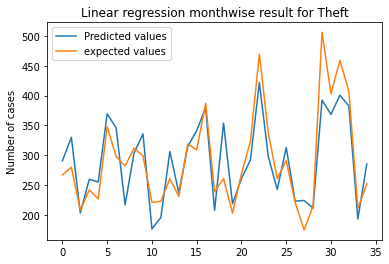

In [ ]:
plt.plot(y_pred)
plt.plot(y_plot)
#plt.xlabel('Time')
plt.ylabel('Number of cases')
plt.title('Linear regression monthwise result for Theft')
plt.legend(["Predicted values", "expected values"])
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(regressor,open('theft_regressor','wb'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


SVR MODEL


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
model=SVR(kernel='linear')

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
rms = mean_squared_error(y_test, y_pred, squared=False)

In [ ]:
rms

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)

In [ ]:
plt.plot(y_pred)
plt.plot(y_plot)
#plt.xlabel('Time')
plt.ylabel('Number of cases')
plt.title('SVR monthwise result for Theft')
plt.legend(["Predicted values", "expected values"])
plt.show()

In [ ]:
model.score(x_test,y_test)

In [ ]:
metrics.r2_score(y_test,y_pred)

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('theft_SVR','wb'))

Train Decision Tree Model


In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt=DecisionTreeRegressor(random_state=42)

In [ ]:
dt.fit(x_train,y_train)

In [ ]:
y_pred_dt=dt.predict(x_test)

In [ ]:
rms = mean_squared_error(y_test, y_pred_dt, squared=False)

In [ ]:
predicted=dt.predict([[2017,4]])

In [ ]:
predicted

In [ ]:
rms

In [ ]:
metrics.mean_absolute_error(y_test,y_pred_dt)

In [ ]:
plt.plot(y_pred_dt)
plt.plot(y_plot)
#plt.xlabel('Time')
plt.ylabel('Number of cases')
plt.title('Decision tree monthwise result for theft')
plt.legend(["Predicted values", "expected values"])
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score

In [ ]:
mae=mean_absolute_error(y_test,y_pred_dt)

In [ ]:
mae

In [ ]:
r2_score(y_test,y_pred_dt)

In [ ]:
pickle.dump(dt,open('theft_DT','wb'))

In [ ]:
#lasso regressor model

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
reg=Lasso(alpha=1.0)

In [ ]:
reg.fit(x_train,y_train)

In [ ]:
y_pred_reg=reg.predict(x_test)

In [ ]:
rms = mean_squared_error(y_test, y_pred_reg, squared=False)

In [ ]:
rms

In [ ]:
metrics.mean_absolute_error(y_test,y_pred_reg)

In [ ]:
mae=mean_absolute_error(y_test,y_pred_reg)

In [ ]:
plt.plot(y_pred)
plt.plot(y_plot)
#plt.xlabel('Time')
plt.ylabel('Number of cases')
plt.title(' Lasso Regressor monthwise result for Theft')
plt.legend(["Predicted values", "expected values"])
plt.show()

In [ ]:
 mae

In [ ]:
r2_score(y_test,y_pred_reg)

In [ ]:
pickle.dump(reg,open('theft_lasso','wb'))

Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf=RandomForestRegressor(random_state=42)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
y_pred_rf=rf.predict(x_test)

In [ ]:
rms = mean_squared_error(y_test, y_pred_rf, squared=False)

In [ ]:
rms

In [ ]:
metrics.mean_absolute_error(y_test,y_pred_rf)

In [ ]:
plt.plot(y_pred_rf)
plt.plot(y_plot)
#plt.xlabel('Time')
plt.ylabel('Number of cases')
plt.title('Random Forest monthwise result for Theft')
plt.legend(["Predicted values", "expected values"])
plt.show()

In [ ]:
mae=mean_absolute_error(y_test,y_pred_rf)

In [ ]:
mae

In [ ]:
r2_score(y_test,y_pred_rf)

In [ ]:
pickle.dump(rf,open('theft_rf','wb'))

In [ ]:
predicted_value=rf.predict([[2017,5]])

In [ ]:
predicted_value